In [27]:
%matplotlib inline
import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt
from tqdm import tqdm

# SNAIL Hamiltonian in the charge basis for single DOF circuit

$$ H=-4E_\text{
        C}\partial_\phi^2-\alpha E_\text{J}\cos(\phi) -n E_\text{J}\cos([\phi - \varphi_\text{ext}] / n)$$
        
We do a cononical transformation: $$\hat{\phi} \rightarrow n\hat{\phi}, \hat{N} \rightarrow \hat{N}/n $$

$$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\partial_\phi^2-\alpha E_\text{J}\cos(n\phi) -n E_\text{J}\cos(\phi - \varphi_\text{ext}/ n)$$
   
$$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\hat{N}^2-\alpha \frac{E_\text{J}}{2}(e^{i n\phi}+e^{-i n\phi}) -n E_\text{J}(e^{i \phi}e^{-i\varphi_\text{ext}/ n} + e^{-i \phi}e^{+i\varphi_\text{ext}/ n})$$
 
 Writing in the charge basis:
 
 $$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\sum_j j^2\left|j\right>\left<j\right|-\alpha \frac{E_\text{J}}{2}\sum_j(\left|j+n\right>\left<j\right|+ \left|j\right>\left<j+n\right|) -n E_\text{J}\sum_j(e^{-i\varphi_\text{ext}/ n}\left|j+1\right>\left<j\right| + e^{i\varphi_\text{ext}/ n}\left|j\right>\left<j+1\right|)$$
        
  If the external flux were added to the small junction:
  
   $$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\sum_j j^2\left|j\right>\left<j\right|-\alpha \frac{E_\text{J}}{2}\sum_j(e^{i\varphi_\text{ext}}\left|j+n\right>\left<j\right|+ e^{-i\varphi_\text{ext}}\left|j\right>\left<j+n\right|) -n E_\text{J}\sum_j(\left|j+1\right>\left<j\right| + \left|j\right>\left<j+1\right|)$$
        
        
 These two Hamiltonians are related by a unitary and must have the same spectra

In [3]:
sn = scq.SNAIL.create()

Output()

In [39]:
EJb, EC, alpha, flux, ECJ, ECg = 47, 0.1, 0.29, 0.41, 1, 100
sn = scq.SNAIL(
    EJ = EJb,
    alpha=alpha,
    EC =  EC,
    n = 3,
    flux = flux, 
    ncut = 30)

In [40]:
ens = sn.eigenvals()
ens-ens[0]

 c:\_lib\python\scqubits\scqubits\core\snail.py: 166ComplexWarning: Casting complex values to real discards the imaginary part
 c:\_lib\python\scqubits\scqubits\core\snail.py: 167

array([ 0.        ,  2.00921296,  4.16828158,  6.4459613 ,  8.82245696,
       11.28370546])

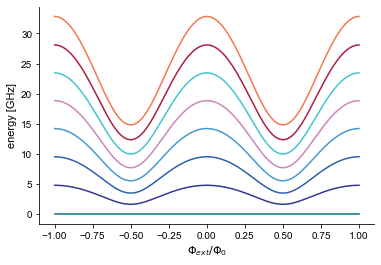

In [41]:
flux_list = np.linspace(-1, 1, 151)
sn.plot_evals_vs_paramvals('flux', flux_list, evals_count=8,subtract_ground=True);

 c:\_lib\python\scqubits\scqubits\core\snail.py: 166ComplexWarning: Casting complex values to real discards the imaginary part
 c:\_lib\python\scqubits\scqubits\core\snail.py: 167

Text(0, 0.5, 'Frequency(GHz)')

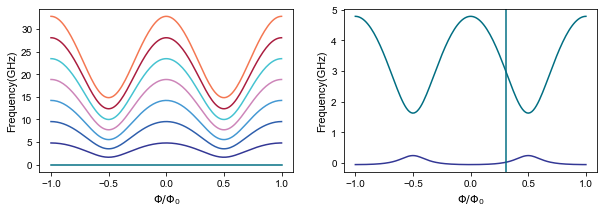

In [42]:
# sn = scq.SNAIL(EJ=47,EC=.1,flux=0.31,alpha=0.0,n=3,ncut=31)

flux_list = np.linspace(-1, 1, 150)
ens_list=[]
for flux in flux_list:
    sn.flux = flux
    ens= sn.eigenvals(evals_count=8)
    ens_list.append(ens-ens[0])
ens_list_sn = np.array(ens_list)

fig,axs = plt.subplots(1,2,figsize=(10,3))
ax = axs[0]
for ii,ens in enumerate(ens_list_sn.T):
    ax.plot(flux_list,ens)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

alphas = [ens_list_sn.T[ii+1]-2*ens_list_sn.T[ii] for ii in range(4)]

ax = axs[1]
ax.plot(flux_list,alphas[0])
ax.plot(flux_list,alphas[1])
ax.axvline(0.31)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

# SNAIL full circuit

In [37]:
sn = scq.SnailQubit.create()

Output()

In [38]:
EJb, EC, alpha, flux, ECJ, ECg, = 47, 0.1, 0.29, 0.41, 1, 100
sqf = scq.SnailQubit(
    EJ1 = EJb,
    EJ2 = EJb,
    EJ3 = EJb,
    EJ4 = EJb*alpha,
    EC1 =  ECJ,
    EC2 =  ECJ,
    EC3 = ECJ,
    EC4 =  EC,
    ECg1 = ECg,
    ECg2 = ECg,
    ECg3 = ECg,
    ng1 = 0,
    ng2 =  0,
    ng3 = 0,
    flux = flux, ncut = 10)

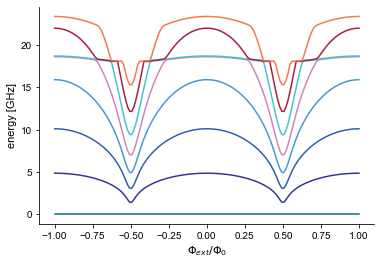

In [17]:
flux_list = np.linspace(-1, 1, 151)
sqf.plot_evals_vs_paramvals('flux', flux_list, evals_count=8,subtract_ground=True);

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:12<00:00,  2.06it/s]


Text(0, 0.5, 'Frequency(GHz)')

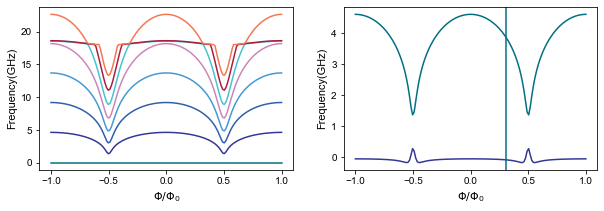

In [30]:
# sn = scq.SNAIL(EJ=47,EC=.1,flux=0.31,alpha=0.0,n=3,ncut=31)

flux_list = np.linspace(-1, 1, 150)
ens_list=[]
for flux in tqdm(flux_list):
    sqf.flux = flux
    ens= sqf.eigenvals(evals_count=8)
    ens_list.append(ens-ens[0])
ens_list_3n = np.array(ens_list)

fig,axs = plt.subplots(1,2,figsize=(10,3))
ax = axs[0]
for ii,ens in enumerate(ens_list_3n.T):
    ax.plot(flux_list,ens)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

alphas = [ens_list_3n.T[ii+1]-2*ens_list_3n.T[ii] for ii in range(4)]

ax = axs[1]
ax.plot(flux_list,alphas[0])
ax.plot(flux_list,alphas[1])
ax.axvline(0.31)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

# comparison between the two

Text(0, 0.5, 'Frequency(GHz)')

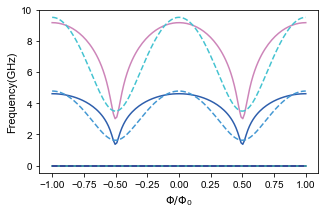

In [44]:
levs = 3
fig,ax = plt.subplots(1,1,figsize=(5,3))

for ii,ens in enumerate(ens_list_3n.T[:levs]):
    ax.plot(flux_list,ens)
    ax.plot(flux_list,ens_list_sn.T[ii],ls='dashed')
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

# alphas = [ens_list_3n.T[ii+1]-2*ens_list_3n.T[ii] for ii in range(4)]

# ax = axs[1]
# ax.plot(flux_list,alphas[0])
# ax.plot(flux_list,alphas[1])
# ax.axvline(0.31)
# ax.set_xlabel('$\Phi/\Phi_0$')
# ax.set_ylabel('Frequency(GHz)')